In [1]:
import panel as pn

pn.extension()

The ``Markdown`` pane allows rendering arbitrary [Markdown](https://python-markdown.github.io) in a panel. It renders strings containing valid Markdown as well as objects with a ``_repr_markdown_`` method, and may define custom CSS styles.

#### Parameters:

For layout and styling related parameters see the [customization user guide](../../user_guide/Customization.ipynb).

* **``dedent``** (bool): Whether to dedent common whitespace across all lines.
* **``extensions``** (list): A list of [Python-Markdown extensions](https://python-markdown.github.io/extensions/) to use.
* **``object``** (str or object): A string containing Markdown, or an object with a ``_repr_markdown_`` method
* **``style``** (dict): Dictionary specifying CSS styles

___

The ``Markdown`` pane accepts all valid Markdown, including embedded HTML. It also supports a ``style`` dictionary to apply styles to control the appearance of the ``<div>`` tag the Markdown contents will be rendered in.

In [2]:
pn.pane.Markdown("""

# H1
## H2
### H3
#### H4
##### H5
###### H6

### Emphasis

Emphasis, aka italics, with *asterisks* or _underscores_.

Strong emphasis, aka bold, with **asterisks** or __underscores__.

Combined emphasis with ** asterisks and _underscores_ **.

<br>

### Table

| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

<br>

### Fenced code

```python
{
  "firstName": "John",
  "lastName": "Smith",
  "age": 25
}
```

### Nested list

1. First list item
    - First nested list item
        - Second nested list item

[This is a link to panel web portal](https://panel.pyviz.org/)

------------
""", width=500)

Markdown(str, width=500)

If you want to control the behavior of the HTML that is generated from the Markdown source, it is often possible to do that by passing parameters to the `style` parameter of this pane.  For instance, you can add a blue border around a Markdown table as follows:

In [3]:
pn.pane.Markdown("""
| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

""", style={'border': "4px solid blue"})

Markdown(str, style={'border': '4px s...})

However, styles specified in this way will only be applied to the outermost Div, and there is not currently any way to apply styling in this way to specific internal elements of the HTML.  In this case, we cannot use the `style` parameter to control styling of the rows or headings of the generated table. 

If we do want to change specific internal elements of the generated HTML, we can do so by providing an HTML/CSS &lt;style&gt; section. For instance, we can change the border thickness for headers and data as follows, but note that the changes will apply to subsequent Markdown as well, including other cells if in a notebook context:

(For this reason the code here saves the result to a separate HTML file, to avoid changing the style for all other tables).

````python
import panel as pn
from bokeh.resources import INLINE
SimpleTable = pn.pane.Markdown("""
<style>
table, th, td {
  border: 5px solid black;
}
</style>
| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

""")

SimpleTable.save('SimpleTable', resources=INLINE)
````

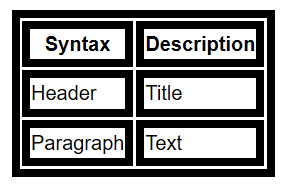

If you want to change styling only for a specific bit of Markdown text, you can do so, but it requires making a special type of Div as a target for the styling. E.g. here we can have only the following table use a red border, without affecting the entire notebook:

In [4]:
css = """
div.special_table + table * {
  border: 1px solid red;
}
"""

pn.extension(raw_css=[css])

pn.panel("""
<div class="special_table"></div>

| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

""")

Markdown(str)